In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES']='1'

In [ ]:
from dataloader_CRAFTS import CRAFTSDataset
from tqdm import tqdm
# data_loader = CRAFTSDataset('../../data/totaltext/Test/', use_net = False, watershed_on = False)

data_loader = CRAFTSDataset('/home/jovyan/nas/2_public_data/aihub_wildscene_labeled/', delimiter = '\t',use_net = False, watershed_on = False)

In [2]:
from end2end_dataloader import CRAFTSDataset
from tqdm import tqdm

data_loader = CRAFTSDataset('/home/jovyan/nas/2_public_data/aihub_wildscene_labeled/', delimiter = '\t',use_net = False, watershed_on = False)

In [3]:
image_batches = data_loader.pull_item(0)[-1]

In [17]:
from torch.autograd import Variable

image = data_loader.pull_item(0)[0]
image = Variable(image.type(torch.FloatTensor)).unsqueeze(0)

In [6]:
from collections import OrderedDict
def copyStateDict(state_dict):
    if list(state_dict.keys())[0].startswith("module"):
        start_idx = 1
    else:
        start_idx = 0
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = ".".join(k.split(".")[start_idx:])
        new_state_dict[name] = v
    return new_state_dict


In [7]:
for image_batch in image_batches :
    plt.show()
    plt.imshow(image_batch.permute(1,2,0).detach().numpy()[:,:,0])
    plt.show()
    plt.imshow(image_batch.permute(1,2,0).detach().numpy()[:,:,1])

NameError: name 'image_batches' is not defined

In [8]:
from craft import CRAFT
import torch
net = CRAFT(num_class = 4)
net.load_state_dict(copyStateDict(torch.load('/home/jovyan/nas/1_user/eunsung.shin@agilesoda.ai/module/CRAFT-reimplement/TwinReaderv2/99/8/CRAFT89.pth')))


<All keys matched successfully>

In [9]:
y, feature = net(image)
feature = feature[0].permute(1,2,0).detach().numpy()


NameError: name 'image' is not defined

In [5]:
feature.shape

NameError: name 'feature' is not defined

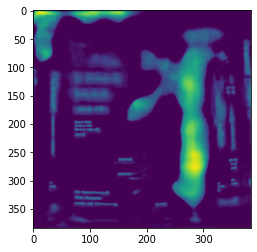

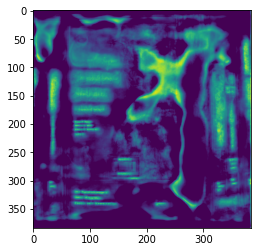

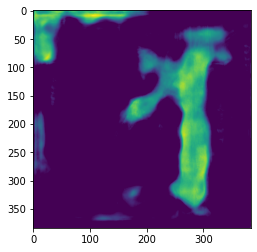

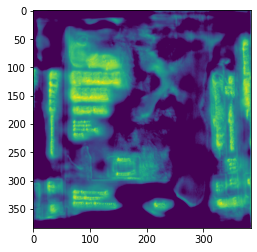

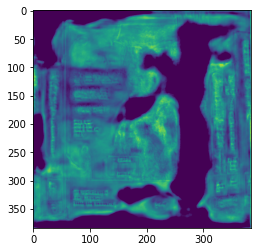

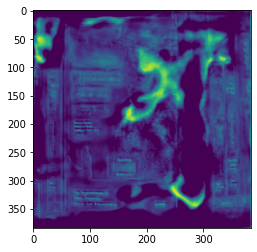

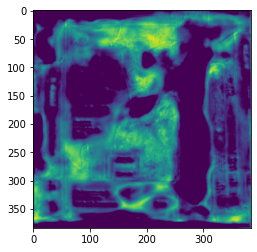

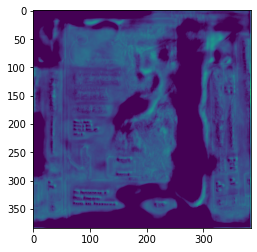

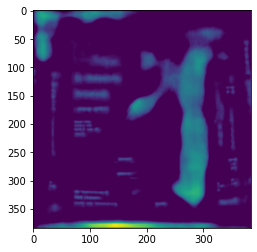

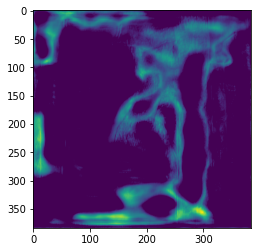

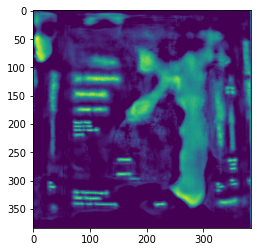

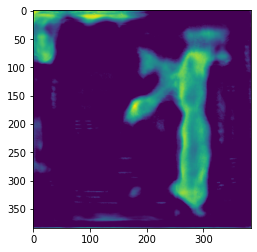

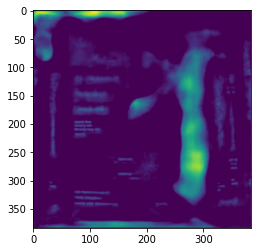

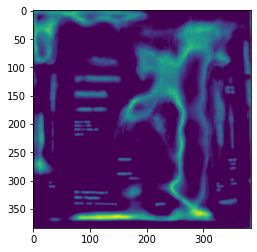

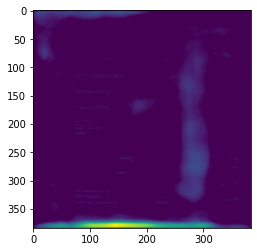

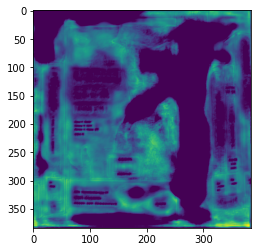

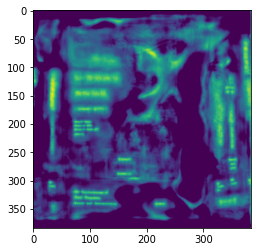

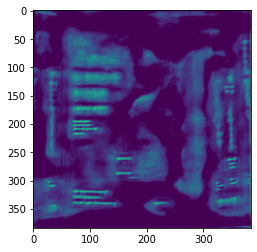

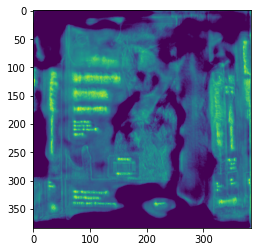

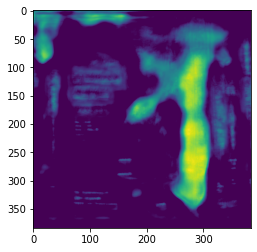

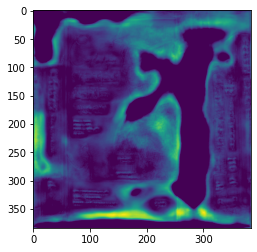

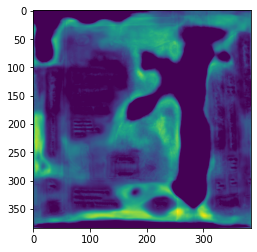

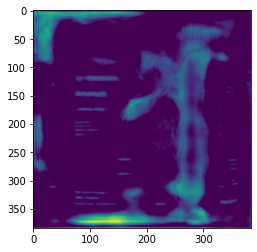

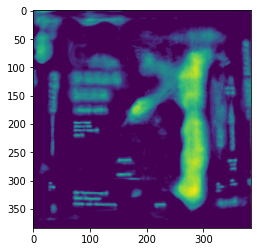

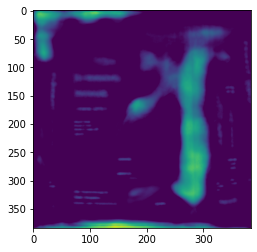

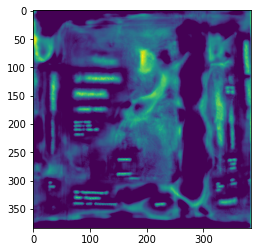

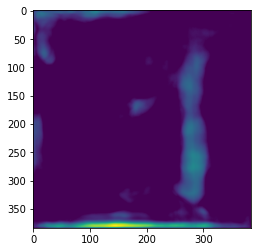

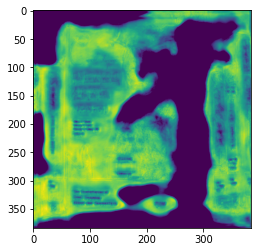

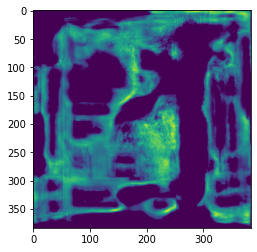

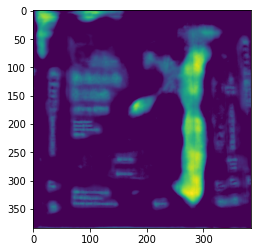

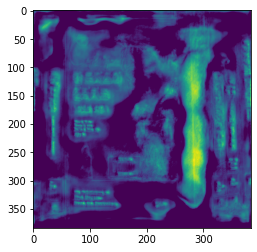

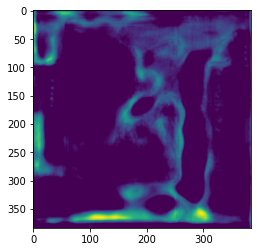

In [28]:
for f in feature :
    plt.show()
    plt.imshow(f)
    

In [29]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, max_len=-1):
        self.val = []
        self.count = []
        self.max_len = max_len
        self.avg = 0

    def update(self, val, n=1):
        self.val.append(val * n)
        self.count.append(n)
        if self.max_len > 0 and len(self.val) > self.max_len:
            self.val = self.val[-self.max_len:]
            self.count = self.count[-self.max_len:]
        self.avg = sum(self.val) / sum(self.count)

In [ ]:
import file_utils

file_utils.load_txt('../../data/totaltext/Test/char_txt/img1096.txt')

In [30]:
loss1 = AverageMeter()
loss2 = AverageMeter()
loss3 = AverageMeter()

In [33]:
import torch

loss1+loss2

# loss1.update()

TypeError: unsupported operand type(s) for +: 'AverageMeter' and 'AverageMeter'

In [ ]:
plt.imshow(data_loader.load_image_gt_and_confidencemask(1)[0])

In [ ]:
image, character_bboxes, words, confidence_mask, confidences = data_loader.load_image_gt_and_confidencemask(1)

In [ ]:
character_bboxes

In [ ]:
image, region_scores_torch, affinity_scores_torch, confidence_mask_torch, orientation_x_torch, orientation_y_torch = data_loader.pull_item(1)


plt.figure(figsize = (30,15))
plt.imshow(np.hstack([region_scores_torch, affinity_scores_torch, orientation_x_torch, orientation_y_torch]))

In [ ]:
plt.imshow(orientation_y_torch)

In [ ]:
for i in range(30) :
    image, region_scores_torch, affinity_scores_torch, confidence_mask_torch, orientation_x_torch, orientation_y_torch = data_loader.pull_item(i)
    plt.show()
    plt.figure(figsize = (15,15))
    plt.imshow(image.permute(1,2,0))
    plt.show()
    plt.figure(figsize = (15,15))
    plt.imshow(region_scores_torch)
    plt.show()
    plt.figure(figsize = (15,15))
    plt.imshow(np.hstack([orientation_x_torch, orientation_y_torch]))
#     plt.show()
#     plt.hist(orientation_x_torch.flatten().tolist())
#     plt.show()
#     plt.hist(orientation_y_torch.flatten().tolist())
#     print(np.unique(orientation_y_torch.flatten().tolist()))
    


In [ ]:
import cv2

blank = np.zeros((100,100))
cv2.polylines(blank, np.int32([[0,1],[2,4]]), False,(255), thickness = 0)

In [ ]:

import numpy as np
plt.hist(region_scores_torch.flatten().tolist())

In [ ]:
plt.imshow(image.permute(1,2,0))

In [ ]:
import matplotlib.pyplot as plt

i = 0

plt.show()
plt.figure(figsize = (15,15))
plt.imshow(image_list[0][i].permute(1,2,0).detach().numpy())
plt.show()
plt.figure(figsize = (15,15))
plt.imshow(heatmap_list[0][i].detach().numpy()*255.)
plt.show()
plt.figure(figsize = (15,15))
plt.imshow(affmap_list[0][i].detach().numpy()*255.)
plt.show()
plt.figure(figsize = (15,15))
plt.imshow(mask_list[0][i].detach().numpy()*255.)
plt.show()
plt.figure(figsize = (15,15))
plt.imshow(ori_x_list[0][i].detach().numpy()*255.)
plt.show()
plt.figure(figsize = (15,15))
plt.imshow(ori_y_list[0][i].detach().numpy()*255.)

In [ ]:
import numpy as np

np.max(affmap_list[0][i].detach().numpy().flatten().tolist())

In [ ]:
import cv2
import numpy as np

region_score = heatmap_list[0][i].detach().numpy()
orientation_x = ori_x_list[0][i].detach().numpy()
orientation_y = ori_y_list[0][i].detach().numpy()

# orientation_x, orientation_y = np.array(orientation_x), np.array(orientation_y)
orientation_h, mask = scale_orientation(orientation_x, orientation_y, region_score)

# orientation_s
orientation_s = region_score.copy()
orientation_s[orientation_s <255.*0.4] = 0
orientation_s = np.uint8(orientation_s)

# orientation_v
scale_region = orientation_s.copy()
scale_region[scale_region<255.*0.3] = 0
orientation_v = scale_region


hsv = cv2.merge([orientation_h, orientation_s, orientation_v])

hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize = (15,15))
plt.imshow(hsv, 'hsv')

In [ ]:
from torchutil import init_weights

net = CRAFT()
net.load_state_dict(copyStateDict(torch.load('./pretrain/craft_mlt_25k.pth')))

net.conv_cls[-1] = nn.Conv2d(16,4, kernel_size = 1)
net.conv_cls[-1].weight.data.fill_(1)
net.conv_cls[-1].bias.data.fill_(0)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(net.conv_cls[-1].bias.flatten().tolist())

In [ ]:
plt.hist(net.conv_cls[-1].weight.flatten().tolist())

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [ ]:
## crafts
import torch
import torch.nn as nn
from craft import CRAFT
import matplotlib.pyplot as plt

In [6]:
from collections import OrderedDict

def copyStateDict(state_dict):
    if list(state_dict.keys())[0].startswith("module"):
        start_idx = 1
    else:
        start_idx = 0
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = ".".join(k.split(".")[start_idx:])
        new_state_dict[name] = v
    return new_state_dict

In [ ]:
def contrast_grey(img):
    high = np.percentile(img, 90)
    low  = np.percentile(img, 10)
    return (high-low)/np.maximum(10, high+low), high, low


def adjust_contrast_grey(img, target = 0.4):
    contrast, high, low = contrast_grey(img)
    if contrast < target:
        img = img.astype(int)
        ratio = 200./np.maximum(10, high-low)
        img = (img - low + 25)*ratio
        img = np.maximum(np.full(img.shape, 0) ,np.minimum(np.full(img.shape, 255), img)).astype(np.uint8)
    return img

In [ ]:
net = CRAFT(num_class = 2)
net.conv_cls[-1] = nn.Conv2d(16, 4, kernel_size = 1)
net.load_state_dict(copyStateDict(torch.load('/home/jovyan/nas/1_user/eunsung.shin@agilesoda.ai/module/CRAFT-reimplement/TwinReaderv2/99/8/CRAFT89.pth')))


In [ ]:
import imgproc
import torch.nn as nn
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from craft import CRAFT
from glob import glob
import cv2
import numpy as np

weight= '/home/jovyan/nas/1_user/eunsung.shin@agilesoda.ai/module/CRAFT-reimplement/TwinReaderv2/911/0/CRAFT567.pth'#'/home/jovyan/nas/1_user/eunsung.shin@agilesoda.ai/module/CRAFT-reimplement/TwinReaderv2/craft_mlt_25k.pth'#
img_dir = '../../data/totaltext/Test/image/*.jpg' #'../../data/STD_eval/image/*.jpg'#


net = CRAFT(num_class = 2)
net.conv_cls[-1] = nn.Conv2d(16, 4, kernel_size = 1)


def inference_craft(img_dir, weight, net, skip_image = False, img_idx = -2) :

    net.load_state_dict(copyStateDict(torch.load(weight)))

    img_list = glob(img_dir)[:10]  #glob('../../data/STD_eval/image/*.jpg')## ## #
    
    for img_idx in range(len(img_list)) :
        image = imgproc.loadImage(img_list[img_idx])
        # image = adjust_contrast_grey(image)
        img_resized, target_ratio, size_heatmap = imgproc.resize_aspect_ratio(image, 2380, interpolation=cv2.INTER_LINEAR, mag_ratio=2)
        ratio_h = ratio_w = 1 / target_ratio

        # # preprocessing
        x = imgproc.normalizeMeanVariance(img_resized)
        x = torch.from_numpy(x).permute(2, 0, 1)    # [h, w, c] to [c, h, w]
        x = Variable(x.unsqueeze(0))                # [c, h, w] to [b, c, h, w]


        # # forward pass
        y, _ = net(x)
        y = y.detach().cpu().numpy()
#         if not skip_image :
        plt.show()
        plt.figure(figsize = (15,15))
        plt.imshow(plt.imread(img_list[img_idx]))

        plt.show()
        plt.figure(figsize = (120,30))
        plt.imshow(np.hstack([y[0,:,:,i] for i in range(4)]))

#     return [y[0,:,:,i] for i in range(4)]

In [ ]:
img_list = glob( '../../data/totaltext/Test/image/*.jpg') #glob('../../data/STD_eval/image/*.jpg')#

In [ ]:
img_idx = -2
plt.show()
plt.figure(figsize = (15,15))
plt.imshow(plt.imread(img_list[img_idx]))

In [ ]:
# result = 
inference_craft(img_dir, weight, net, img_idx)

In [ ]:
plt.imshow(result[0])

In [ ]:
result = inference_craft(img_dir, weight, net)

In [ ]:
plt.hist(result[1].flatten().tolist())

In [ ]:
plt.hist(result_craft[1].flatten().tolist())

In [ ]:
def inference_thru_training(img_dir, weight_dir, net) :
    
    weights = glob(os.path.join(weight_dir, '*.pth'))
    
    max_num = max([int(os.path.basename(weight).replace('.pth', '').replace('CRAFT','')) for weight in weights])
    
    for weight_num in range(0,max_num,max_num//5) :
        print('weight # : ', str(weight_num))
        weight = os.path.join(weight_dir, 'CRAFT'+str(weight_num)+'.pth')
        inference_craft(img_dir, weight, net)
        
    

In [ ]:
import os

inference_thru_training(img_dir, weight_dir = '/home/jovyan/nas/1_user/eunsung.shin@agilesoda.ai/module/CRAFT-reimplement/TwinReaderv2/99/8/', net = net)

In [ ]:
# plt.imshow(result[1])

plt.hist(result[1].flatten().tolist())

In [ ]:
plt.hist(y[0,:,:,1].flatten().tolist())

In [ ]:
plt.hist(y[0,:,:,2].flatten().tolist())

In [ ]:
plt.hist(y[0,:,:,3].flatten().tolist())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
    
plt.figure(figsize = (15,15))
plt.imshow(np.hstack([y[0,:,:,i] for i in range(4)]))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
    
plt.figure(figsize = (15,15))
plt.imshow(np.hstack([y[0,:,:,i] for i in range(4)]))

In [ ]:
def scale_orientation(orientation_x, orientation_y, region_scores) :
    
#     scale_region = region_scores.copy()
#     scale_region[scale_region<255*0.2] = 0
#     orientation_x_region = np.multiply(scale_region/255., (np.array(orientation_x)/255. - 0.5))
#     orientation_y_region = np.multiply(scale_region/255., (np.array(orientation_y)/255. - 0.5))
    orientation_region = np.arctan(np.array(orientation_y) / np.array(orientation_x) )*255.
    
#     orientation_region = cv2.cvtColor(orientation_region, cv2.COLOR_GRAY2BGR)
#     orientation_region = cv2.cvtColor(orientation_region, cv2.COLOR_BGR2HSV)
    mask = np.zeros_like(orientation_x)
    
    mask[np.isnan(orientation_region)] = 0
    mask[~np.isnan(orientation_region)] = 255
#     orientation_region[np.isnan(orientation_region)] = 0 
    return np.uint8(orientation_region) , np.uint8(mask)
    

In [ ]:
# plt.imshow(result[2])

plt.imshow(np.arctan(result[3]/result[2])*255.)

In [ ]:
region_score = result[0]*255.
orientation_x = result[2]
orientation_y = result[3]

# orientation_x, orientation_y = np.array(orientation_x), np.array(orientation_y)
orientation_h, mask = scale_orientation(orientation_x, orientation_y, region_score)


# orientation_s
orientation_s = region_score.copy()
orientation_s[orientation_s <255.*0.2] = 0
orientation_s = np.uint8(orientation_s)

# orientation_v
scale_region = orientation_s.copy()
scale_region[scale_region<255.*0.3] = 0
orientation_v = scale_region


hsv = cv2.merge([orientation_h, orientation_s, orientation_v])

hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize = (15,15))
plt.imshow(hsv)

In [ ]:
result[0]

In [ ]:
def inference_craft_orientation(img_dir, weight, net, skip_image = False, img_idx = -2) :

    net.load_state_dict(copyStateDict(torch.load(weight)))

    img_list = glob(img_dir)[:10]  #glob('../../data/STD_eval/image/*.jpg')## ## #
    
    for img_idx in range(len(img_list)) :
        image = imgproc.loadImage(img_list[img_idx])
        # image = adjust_contrast_grey(image)
        img_resized, target_ratio, size_heatmap = imgproc.resize_aspect_ratio(image, 2380, interpolation=cv2.INTER_LINEAR, mag_ratio=2)
        ratio_h = ratio_w = 1 / target_ratio

        # # preprocessing
        x = imgproc.normalizeMeanVariance(img_resized)
        x = torch.from_numpy(x).permute(2, 0, 1)    # [h, w, c] to [c, h, w]
        x = Variable(x.unsqueeze(0))                # [c, h, w] to [b, c, h, w]


        # # forward pass
        y, _ = net(x)
        y = y.detach().cpu().numpy()
#         if not skip_image :

        result = [y[0,:,:,i] for i in range(4)]
        plt.show()
        plt.figure(figsize = (15,15))
        plt.imshow(plt.imread(img_list[img_idx]))

        plt.show()
        plt.figure(figsize = (120,30))
        plt.imshow(np.hstack(result))
        
        
        
        region_score = result[0]*255.
        orientation_x = result[2]
        orientation_y = result[3]

        # orientation_x, orientation_y = np.array(orientation_x), np.array(orientation_y)
        orientation_h, mask = scale_orientation(orientation_x, orientation_y, region_score)

    

        # orientation_s
        orientation_s = region_score.copy()
        orientation_s[orientation_s <255.*0.2] = 0
        orientation_s = np.uint8(orientation_s)

        # orientation_v
        scale_region = orientation_s.copy()
        scale_region[scale_region<255.*0.3] = 0
        orientation_v = scale_region


        hsv = cv2.merge([orientation_h, orientation_s, orientation_v])

        hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
        plt.show()
        plt.figure(figsize = (15,15))
        plt.imshow(hsv)
#     return [y[0,:,:,i] for i in range(4)]

In [ ]:
weight= '/home/jovyan/nas/1_user/eunsung.shin@agilesoda.ai/module/CRAFT-reimplement/TwinReaderv2/911/0/CRAFT567.pth'
img_dir = '/home/jovyan/nas/3_project_data/TwinReader/Hanwha-Full_text_labeled/1_all_vertical change(210908)/진료비세부내역서/*.png'#'../../data/STD_eval/image/*.jpg'
inference_craft_orientation(img_dir, weight, net, img_idx=50)

In [ ]:
weight= '/home/jovyan/nas/1_user/eunsung.shin@agilesoda.ai/module/CRAFT-reimplement/TwinReaderv2/915/0/CRAFT45.pth'
img_dir = '../../data/totaltext/Test/image/*.jpg'
inference_craft_orientation(img_dir, weight, net, img_idx=50)